Домашнее задание
Как узнать свою аудиторию? Построение различных вариантов кластеризаций и интерпретация результатов. 

Цель:
На этот раз займемся классической задачкой - сегментация клиентов (в данном случае - банка). Крайне полезная операция, которая позволяет вам лучше познакомится со своей аудиторией, понять, на какие группы она делится и чем они характеризуются.

Описание/Пошаговая инструкция выполнения домашнего задания:
Часть 1. EDA и Preprocessing
1.Скачайте данные по клиентам немецкого банка: https://www.kaggle.com/uciml/german-credit
2.Проведите EDA, чтобы познакомиться с признаками 
3.Преобразуйте все признаки в числовые подходящими методами
4.Приведите все данные к одному масштабу (а заодно поясните, почему это необходимая операция при кластеризации)

Часть 2. Моделирование
1.Постройте три варианта кластеризации: k-means, hierarhical и DBSCAN, подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot 
2.Также воспользуйтесь различными вариантами сжатия признакового пространства (PCA, UMAP, tSNE) и визуализируйте результаты кластеризации на двумерной плоскости 

Часть 3. Интерпретация
1.Теперь ваша задача - попытаться проинтерпретировать получившиеся кластеры, начните с простого расчета средних значений признаков для каждого из кластеров, есть ли интересные закономерности? 
2.Теперь постройте boxplot-ы для каждого признака, сгруппировав значения по кластерам, по каким признакам заметно наибольшее отличие кластеров друг от друга? Можно ли их интерпретировать? 

#Часть 1. EDA 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
# Пара библиотек для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# Данные по клиентам
clients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML:PRO OTUS/9_ DB-Scan_spectral_clasterisation_HW2/german_credit_data.csv')
print(clients.shape,type(clients))
print('total num of Nan = ',clients.isna().sum().sum())

(1000, 10) <class 'pandas.core.frame.DataFrame'>
total num of Nan =  577


In [ ]:
clients.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Data is from https://www.kaggle.com/uciml/german-credit

Short Context
Each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

Age (numeric)
Sex (text: male, female)
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
Housing (text: own, rent, or free)
Saving accounts (text - little, moderate, quite rich, rich)
Checking account (numeric, in DM - Deutsch Mark)
Credit amount (numeric, in DM)
Duration (numeric, in month)
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
Acknowledgements
Source: UCI https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

In [ ]:
clients=clients.drop(columns=['Unnamed: 0'])
clients.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [ ]:
numerical_features = ['Age', 'Job', 'Credit amount', 'Duration']
binary_features = ['Sex']
categorical_features = [
    col for col in clients.columns if col not in numerical_features + binary_features
]
all_features = categorical_features + numerical_features + binary_features
print(all_features)

['Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Age', 'Job', 'Credit amount', 'Duration', 'Sex']


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


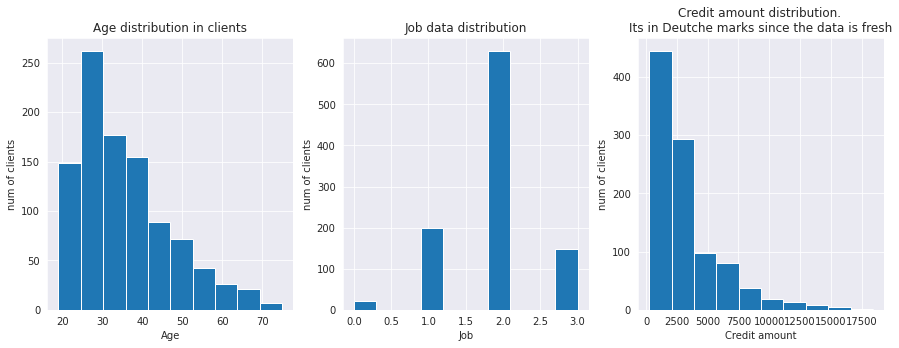

					Job (numeric: 0 - unskilled and non-resident,
					 1 - unskilled and resident, 
					2 - skilled, 3 - highly skilled)


In [ ]:
plt.figure(figsize=(15,5))

#plot 1:
plt.subplot(1, 3, 1)
plt.hist(clients['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('num of clients')
plt.title('Age distribution in clients')

#plot 2:
plt.subplot(1, 3, 2)
plt.hist(clients['Job'], bins=10)
plt.xlabel('Job')
plt.ylabel('num of clients')
plt.title('Job data distribution')

#plot 3:
plt.subplot(1, 3,3)
plt.hist(clients['Credit amount'], bins=10)
plt.xlabel('Credit amount')
plt.ylabel('num of clients')
plt.title('Credit amount distribution. \nIts in Deutche marks since the data is fresh')

plt.show()
print("\t\t\t\t\tJob (numeric: 0 - unskilled and non-resident,\n\t\t\t\t\t 1 - unskilled and resident, \n\t\t\t\t\t2 - skilled, 3 - highly skilled)")

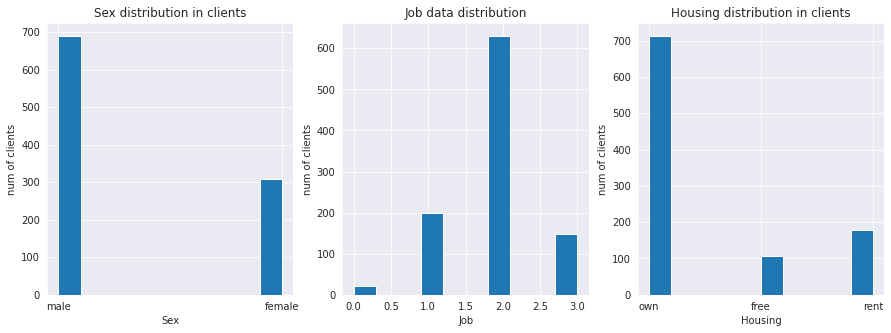

In [ ]:
plt.figure(figsize=(15,5))

#plot 1:
plt.subplot(1, 3, 1)
plt.hist(clients['Sex'])
plt.xlabel('Sex')
plt.ylabel('num of clients')
plt.title('Sex distribution in clients')

#plot 2:
plt.subplot(1, 3, 2)
plt.hist(clients['Job'])
plt.xlabel('Job')
plt.ylabel('num of clients')
plt.title('Job data distribution')

#plot 3:
plt.subplot(1, 3, 3)
plt.hist(clients['Housing'])
plt.xlabel('Housing')
plt.ylabel('num of clients')
plt.title('Housing distribution in clients')

plt.show()

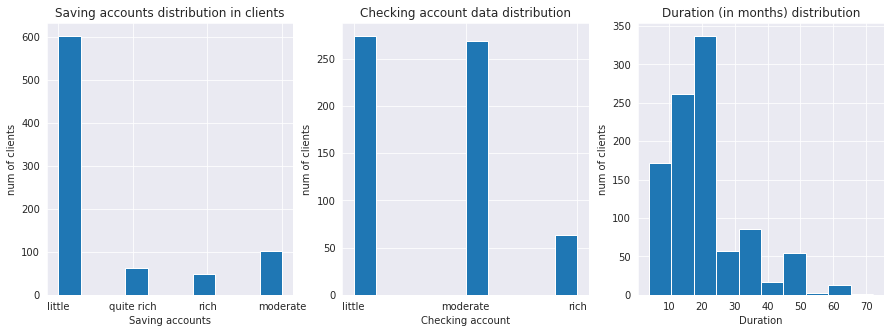

In [ ]:
plt.figure(figsize=(15,5))

#plot 1:
plt.subplot(1, 3, 1)
a_savin_acc = [x for x in clients['Saving accounts'] if not pd.isnull(x)]
plt.hist(a_savin_acc)
plt.xlabel('Saving accounts')
plt.ylabel('num of clients')
plt.title('Saving accounts distribution in clients')
#plot 2:
plt.subplot(1, 3, 2)
a_checkin_acc = [x for x in clients['Checking account'] if not pd.isnull(x)]
plt.hist(a_checkin_acc)
plt.xlabel('Checking account')
plt.ylabel('num of clients')
plt.title('Checking account data distribution')
#plot 3:
plt.subplot(1, 3, 3)
plt.hist(clients['Duration'], bins=10)
plt.xlabel('Duration')
plt.ylabel('num of clients')
plt.title('Duration (in months) distribution')
plt.show()

In [ ]:
clients['Purpose'].value_counts()


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)


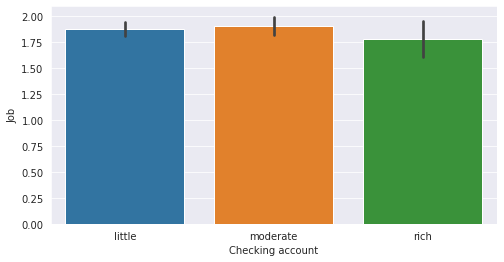

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Checking account', y='Job', data=clients)
print("Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)")
#Credit amount

Credit amount in deutche marks since the data is prehistoric


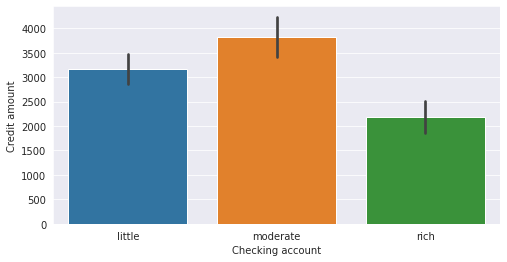

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Checking account', y='Credit amount', data=clients)
print("Credit amount in deutche marks since the data is prehistoric")

not much but there is a dependency btw Jobs and Purpose


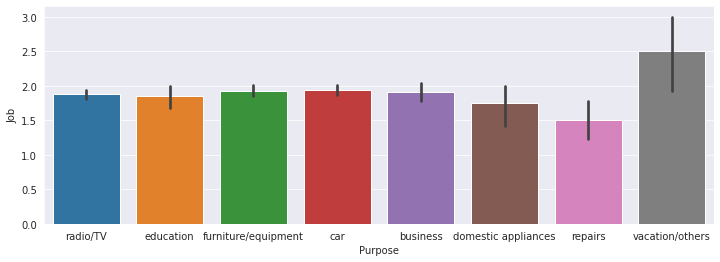

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x='Purpose', y='Job', data=clients)
print('not much but there is a dependency btw Jobs and Purpose')

# ...& Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler
# we had
#all_features = categorical_features + numerical_features + binary_features
print(numerical_features)
scaler = StandardScaler() # Нормировка для численных признаков
data_scaled = scaler.fit_transform(clients[numerical_features])
data_scaled[:10]

['Age', 'Job', 'Credit amount', 'Duration']


array([[ 2.76645648,  0.14694918, -0.74513141, -1.23647786],
       [-1.19140394,  0.14694918,  0.94981679,  2.24819436],
       [ 1.18331231, -1.38377145, -0.41656241, -0.73866754],
       [ 0.8315025 ,  0.14694918,  1.63424694,  1.75038404],
       [ 1.53512213,  0.14694918,  0.5666635 ,  0.25695309],
       [-0.04802204, -1.38377145,  2.05000901,  1.25257373],
       [ 1.53512213,  0.14694918, -0.15462876,  0.25695309],
       [-0.04802204,  1.67766981,  1.30319683,  1.25257373],
       [ 2.23874176, -1.38377145, -0.07523344, -0.73866754],
       [-0.66368922,  1.67766981,  0.69568089,  0.75476341]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_bin = OneHotEncoder(sparse=False, handle_unknown='ignore')  # code binary features
print(binary_features)
data_bin_ohe = ohe_bin.fit_transform(clients[binary_features])
#data_bin_ohe[:10]

['Sex']


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
clients['Saving accounts']=imputer.fit_transform(clients['Saving accounts'].values.reshape(-1,1))[:,0]
clients['Checking account']=imputer.fit_transform(clients['Checking account'].values.reshape(-1,1))[:,0]

print('total num of Nan = ',clients.isna().sum().sum())

total num of Nan =  0


In [ ]:
ohe_cat = OneHotEncoder(sparse=False, handle_unknown='ignore')  # code binary features
print(categorical_features)
data_cat_ohe = ohe_cat.fit_transform(clients[categorical_features])
#data_cat_ohe[:10]

['Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [ ]:
#all_features = numerical_features + binary_features + categorical_features 
data_tramsformed = pd.concat([pd.DataFrame(data_scaled, columns=numerical_features),
                                    pd.DataFrame(data_bin_ohe, columns=ohe_bin.get_feature_names_out()),
                                    pd.DataFrame(data_cat_ohe, columns=ohe_cat.get_feature_names_out()),
                                   ], axis=1)

data_tramsformed.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,0.146949,-0.745131,-1.236478,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.191404,0.146949,0.949817,2.248194,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.183312,-1.383771,-0.416562,-0.738668,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.831502,0.146949,1.634247,1.750384,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.535122,0.146949,0.566664,0.256953,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#Optimizing parameters

#PCA - Principal Component Analysis

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pca.fit(data_tramsformed)

PCA()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27929405, 0.44157883, 0.57268732, 0.64131104, 0.70263168,
       0.76290676, 0.80887298, 0.84876028, 0.88322761, 0.91511686,
       0.93274662, 0.94932564, 0.96241417, 0.97411129, 0.98389377,
       0.99197256, 0.99600126, 0.99823927, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

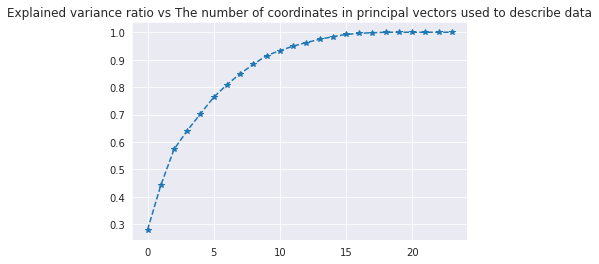

In [ ]:
plt.title("Explained variance ratio vs The number of coordinates in principal vectors used to describe data")
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), '*--')

In [ ]:
pca_data_transformed = PCA(n_components=len(pca.explained_variance_ratio_)-6).fit_transform(data_tramsformed)

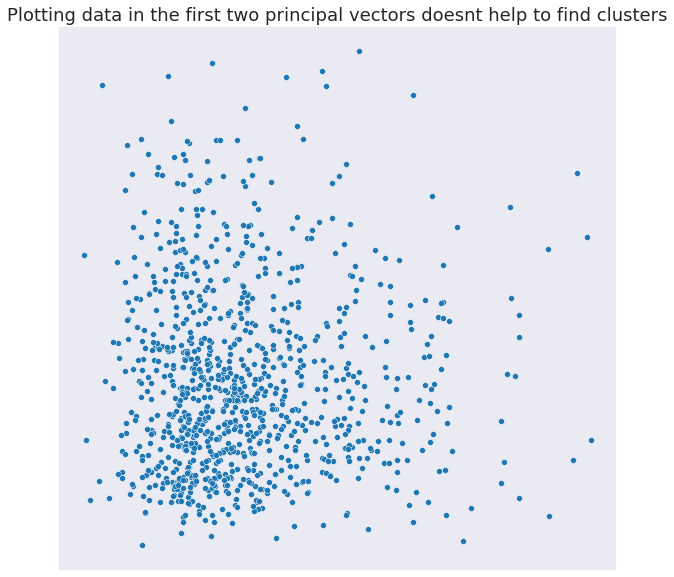

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=pca_data_transformed[:, 0], 
    y=pca_data_transformed[:, 1], 
    legend='full'
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Plotting data in the first two principal vectors doesnt help to find clusters", fontsize=18)

plt.show()

# TSNE

## t-Distributed Stochastic Neighbour Embedding

In [ ]:
# !pip install MulticoreTSNE
#help(TSNE)

In [ ]:
#from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_components=5, random_state=42, n_jobs=-1)
tsne_data_transformed = tsne.fit_transform(data_tramsformed)

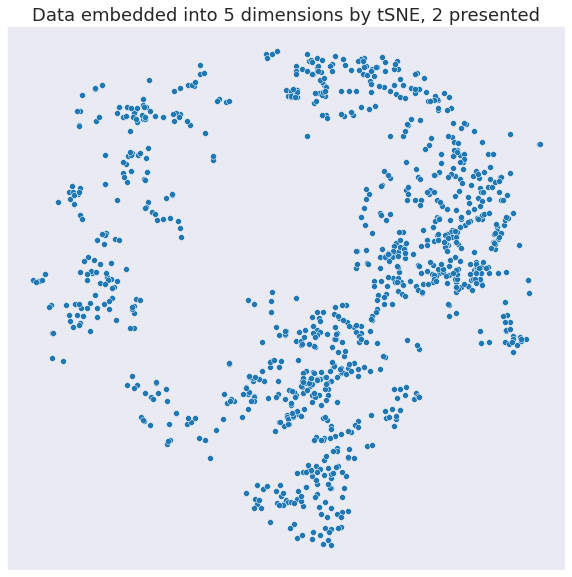

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=tsne_data_transformed[:, 0],
    y=tsne_data_transformed[:, 1],  
)
plt.title("Data embedded into 5 dimensions by tSNE, 2 presented", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()

TSNE algorythm is weird. It seems like the more dimesions you leave it to play with it has to perform more calculations. The solving time becomes unreasonable after n_components=5. It also requires drastic amounts of RAM

#UMAP

In [ ]:
# !pip install umap-learn

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 37.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=78b006c44032a8cdfed8a303443b40c27559352afea32765aeac08b48f3d08cd
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=4ff04aea623162cc29d3c19c2dc7588d65d788a316ebfe3989a58a5032d51056
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
import umap

In [236]:
reducer = umap.UMAP(n_components=15,random_state=42)
umap_data_transformed = reducer.fit_transform(data_tramsformed)

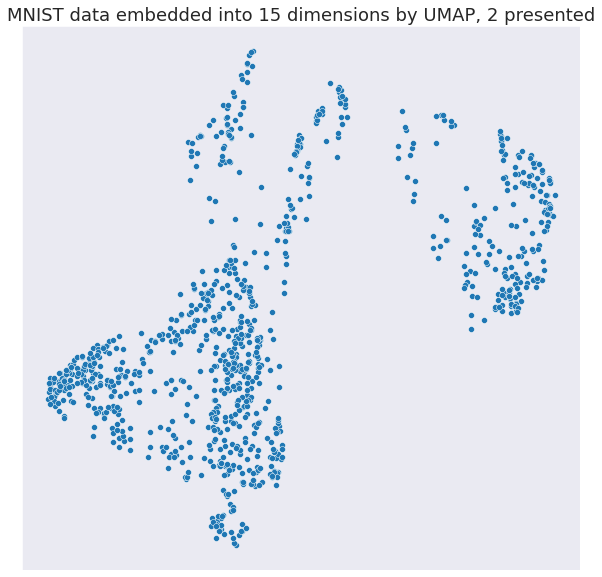

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=umap_data_transformed[:, 0], 
    y=umap_data_transformed[:, 1], 
    legend='full'
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into 15 dimensions by UMAP, 2 presented", fontsize=18)

plt.show()

UMAP seems to be much faster than tSNE with the same number of n_components used. The algorythms are very different, i think i should read more about them....

#Fitting with K-means method

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
k_max = 15

inertia = []
silhouette_avg = []
for k in range(1, k_max):
    kmeans = KMeans(n_clusters=k).fit(tsne_data_transformed)
    inertia.append(np.sqrt(kmeans.inertia_))
    if k > 1:
      silhouette_avg.append(silhouette_score(tsne_data_transformed, kmeans.labels_))

d = {}
for k in range(2, k_max-1):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

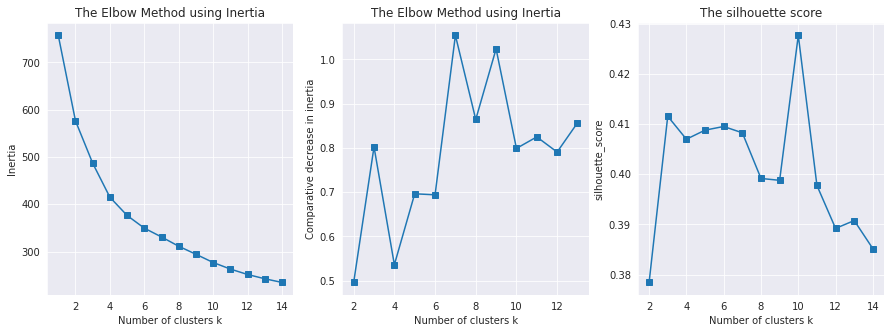

It's really unclear what number of clusters to use based on Elbow rule... either 2 or 4...
Best Silhouette score is 10? Or may be 3 it's really unclear as well...


In [ ]:
plt.figure(figsize=(15,5))

#plot 1:
plt.subplot(1, 3, 1)
#plt.figure(figsize=(12, 4))
plt.plot(range(1, k_max), inertia, marker='s')

plt.title('The Elbow Method using Inertia')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')

#plot 2:
plt.subplot(1, 3, 2)
#plt.figure(figsize=(12, 4))
plt.plot(range(2, k_max-1), [x for x in d.values()], marker='s')

plt.title('The Elbow Method using Inertia')
plt.xlabel('Number of clusters k')
plt.ylabel('Comparative decrease in inertia')

#plot 3:
plt.subplot(1, 3, 3)
plt.plot(range(2, k_max), silhouette_avg, marker='s')

plt.title('The silhouette score')
plt.xlabel('Number of clusters k')
plt.ylabel('silhouette_score')

plt.show()

print("It's really unclear what number of clusters to use based on Elbow rule... either 2 or 4...")
print("Best Silhouette score is 10? Or may be 3 it's really unclear as well...")

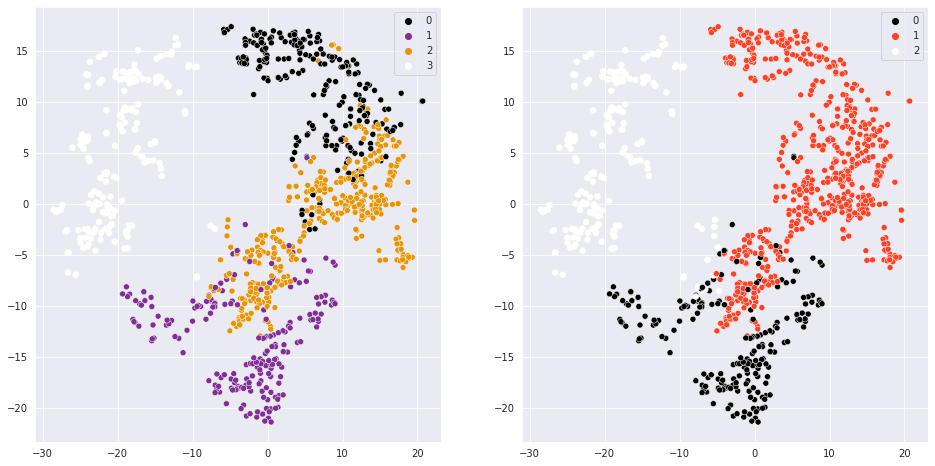

K-Means results with 4 clusters for the rule of the elbow and 3 for the Silhouette score


In [ ]:
plt.figure(figsize=(16,8))

#plot 1:
plt.subplot(1, 2, 1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(tsne_data_transformed)

#plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_data_transformed[:, 0], 
    y=tsne_data_transformed[:, 1], 
    hue=kmeans.labels_, 
    palette="CMRmap",
    legend='full'
);
#plot 2:
plt.subplot(1, 2, 2)
kmeans = KMeans(n_clusters=3)
kmeans.fit(tsne_data_transformed)

#plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_data_transformed[:, 0], 
    y=tsne_data_transformed[:, 1], 
    hue=kmeans.labels_, 
    palette="CMRmap",
    legend='full'
);
plt.show()

print("K-Means results with 4 clusters for the rule of the elbow and 3 for the Silhouette score")

#Fitting with Agglomerative Clustering method

In [ ]:
k_max = 15

inertia = []
silhouette_avg = []
for k in range(1, k_max):
    Ward = AgglomerativeClustering(n_clusters=k).fit(tsne_data_transformed)
    if k > 1:
      silhouette_avg.append(silhouette_score(tsne_data_transformed, Ward.labels_))


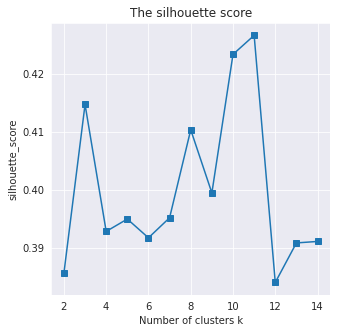

The best score is eithr 3 or 10-11


In [ ]:
plt.figure(figsize=(5,5))
plt.plot(range(2, k_max), silhouette_avg, marker='s')
plt.title('The silhouette score')
plt.xlabel('Number of clusters k')
plt.ylabel('silhouette_score')

plt.show()

print("The best score is eithr 3 or 10-11")

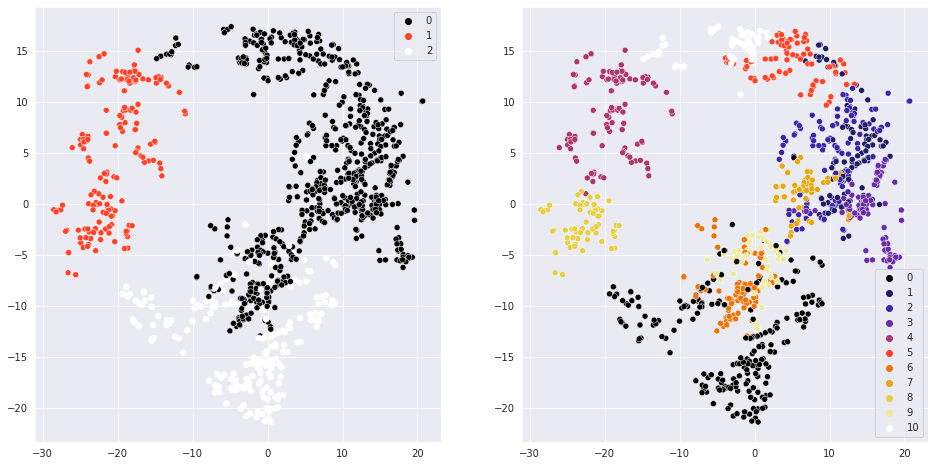

Agglomerative Clustering results with 3 and 11 clusters for the Silhouette score


In [ ]:
plt.figure(figsize=(16,8))

#plot 1:
plt.subplot(1, 2, 1)
Ward = AgglomerativeClustering(n_clusters=3)
Ward.fit(tsne_data_transformed)
sns.scatterplot(
    x=tsne_data_transformed[:, 0], 
    y=tsne_data_transformed[:, 1], 
    hue=Ward.labels_, 
    palette="CMRmap",
    legend='full'
);
#plot 2:
plt.subplot(1, 2, 2)
Ward = AgglomerativeClustering(n_clusters=11)
Ward.fit(tsne_data_transformed)
sns.scatterplot(
    x=tsne_data_transformed[:, 0], 
    y=tsne_data_transformed[:, 1], 
    hue=Ward.labels_, 
    palette="CMRmap",
    legend='full'
);
plt.show()

print("Agglomerative Clustering results with 3 and 11 clusters for the Silhouette score")

#Fitting with the DBSCAN

In [234]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist

measure distances in the data


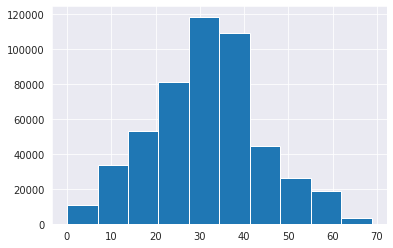

In [235]:
plt.hist(pdist(tsne_data_transformed))
print("measure distances in the data")


In [ ]:
k_max = 30

k_store = []
silhouette_avg = []
cluster_num= []
for k in range(2, k_max, 1):
    db = DBSCAN(eps = k).fit(tsne_data_transformed)
    if max(db.labels_) > 0:
      silhouette_avg.append(silhouette_score(tsne_data_transformed, db.labels_))
      k_store.append(k)
      cluster_num.append(max(db.labels_)+1)


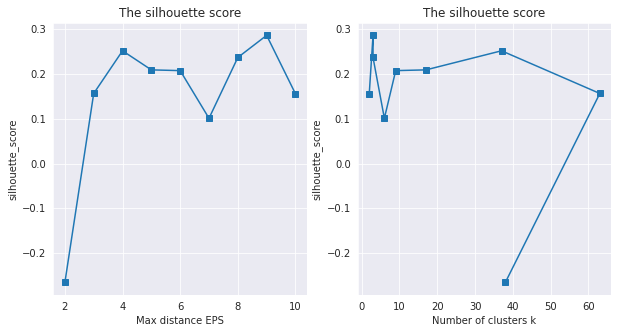

Best Silhouette score is at EPS=9 which corresponds to 4(?) clusters


In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(k_store, silhouette_avg, marker='s')
plt.title('The silhouette score')
plt.xlabel('Max distance EPS')
plt.ylabel('silhouette_score')
#plot 2:
plt.subplot(1, 2, 2)
plt.plot(cluster_num, silhouette_avg, marker='s')
plt.title('The silhouette score')
plt.xlabel('Number of clusters k')
plt.ylabel('silhouette_score')
plt.show()

print("Best Silhouette score is at EPS=9 which corresponds to 4(?) clusters")

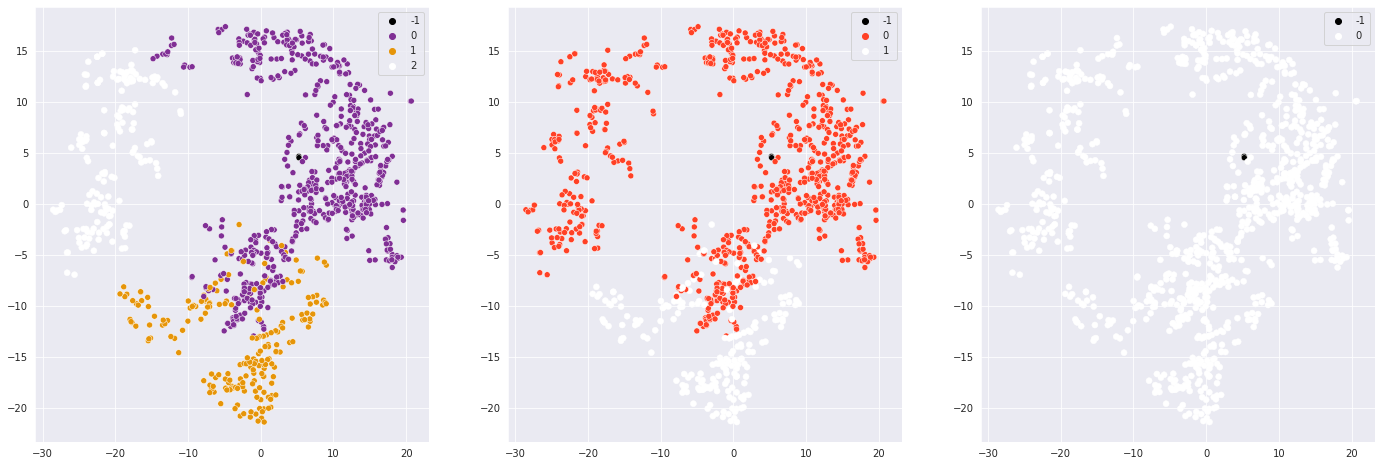

Best DBSCAN results max distance eps = 9.... Well we definetly can see some NOISE data here detected 
eps = 10 and 11 show interesting noise data detection consistently in a single location


In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1, 3, 1)
db = DBSCAN(eps = 9)
db.fit(tsne_data_transformed)
sns.scatterplot(
    x=tsne_data_transformed[:, 0], 
    y=tsne_data_transformed[:, 1], 
    hue=db.labels_, 
    palette="CMRmap",
    legend='full'
);
plt.subplot(1,3, 2)
db = DBSCAN(eps = 10)
db.fit(tsne_data_transformed)
sns.scatterplot(
    x=tsne_data_transformed[:, 0], 
    y=tsne_data_transformed[:, 1], 
    hue=db.labels_, 
    palette="CMRmap",
    legend='full'
);

plt.subplot(1,3, 3)
db = DBSCAN(eps = 11)
db.fit(tsne_data_transformed)
sns.scatterplot(
    x=tsne_data_transformed[:, 0], 
    y=tsne_data_transformed[:, 1], 
    hue=db.labels_, 
    palette="CMRmap",
    legend='full'
);
plt.show()

print("Best DBSCAN results max distance eps = 9.... Well we definetly can see some NOISE data here detected ")
print("eps = 10 and 11 show interesting noise data detection consistently in a single location")

#Fitting again with DBSCAN based on UMAP data transformation

measure distances in the data


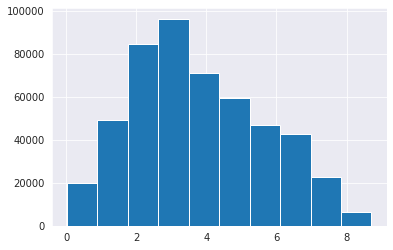

In [237]:
plt.hist(pdist(umap_data_transformed))
print("measure distances in the data")

In [242]:
k_max = 40

k_store = []
silhouette_avg = []
cluster_num= []
for k in range(1, k_max, 1):
    db = DBSCAN(eps = k/10.0).fit(umap_data_transformed)
    if max(db.labels_) > 0:
      silhouette_avg.append(silhouette_score(umap_data_transformed, db.labels_))
      k_store.append(k/10.0)
      cluster_num.append(max(db.labels_)+1)


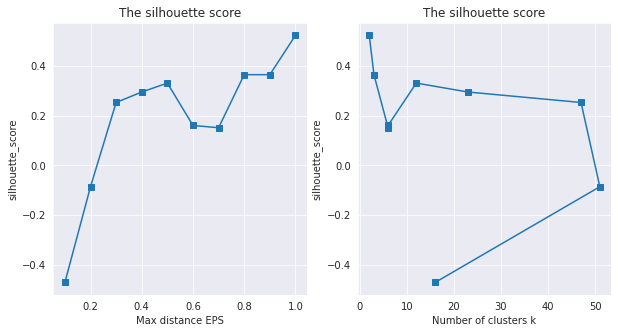

Best Silhouette score is at EPS=9 which corresponds to 4(?) clusters


In [243]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(k_store, silhouette_avg, marker='s')
plt.title('The silhouette score')
plt.xlabel('Max distance EPS')
plt.ylabel('silhouette_score')
#plot 2:
plt.subplot(1, 2, 2)
plt.plot(cluster_num, silhouette_avg, marker='s')
plt.title('The silhouette score')
plt.xlabel('Number of clusters k')
plt.ylabel('silhouette_score')
plt.show()

print("Best Silhouette score is at EPS=9 which corresponds to 4(?) clusters")

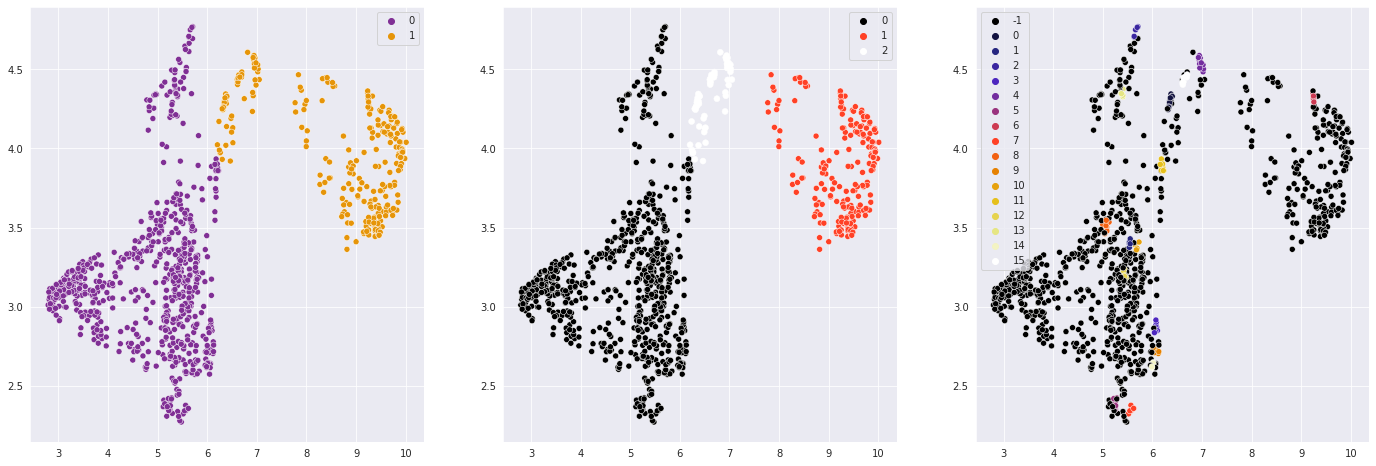

Best DBSCAN results max distance eps = 1.0.... No NOISE data  is detected 
eps = 1.0 and 0.9 are making much more sence than eps=0.1 on the right side with lots of clusters


In [246]:
plt.figure(figsize=(24,8))

plt.subplot(1, 3, 1)
db = DBSCAN(eps = 1)
db.fit(umap_data_transformed)
sns.scatterplot(
    x=umap_data_transformed[:, 0], 
    y=umap_data_transformed[:, 1], 
    hue=db.labels_, 
    palette="CMRmap",
    legend='full'
);
plt.subplot(1,3, 2)
db = DBSCAN(eps = 0.9)
db.fit(umap_data_transformed)
sns.scatterplot(
    x=umap_data_transformed[:, 0], 
    y=umap_data_transformed[:, 1], 
    hue=db.labels_, 
    palette="CMRmap",
    legend='full'
);

plt.subplot(1,3, 3)
db = DBSCAN(eps = 0.1)
db.fit(umap_data_transformed)
sns.scatterplot(
    x=umap_data_transformed[:, 0], 
    y=umap_data_transformed[:, 1], 
    hue=db.labels_, 
    palette="CMRmap",
    legend='full'
);
plt.show()

print("Best DBSCAN results max distance eps = 1.0.... No NOISE data  is detected ")
print("eps = 1.0 and 0.9 are making much more sence than eps=0.1 on the right side with lots of clusters")

#Analysis tSNE + DBSCAN

**Considering the nature of the task I'll divide the clients in two clusters..**

In [ ]:
db = DBSCAN(eps = 10)
db.fit(tsne_data_transformed)
clients['cluster'] = db.labels_

In [ ]:
client_noise = clients[clients["cluster"] < 0]
client_noise.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
607,50,female,2,free,moderate,moderate,2671,36,radio/TV,-1
702,47,female,2,free,moderate,rich,1377,24,radio/TV,-1


the exceptional cluster -1... doesn't really seem to be different

In [ ]:
clients_wo_noise = clients[clients["cluster"] > -1]

Cant see the age difference in clusters


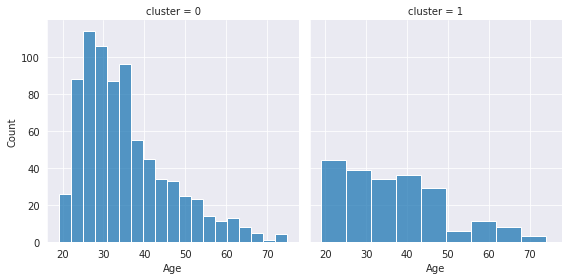

In [ ]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Age')
print("Cant see the age difference in clusters")

Jobs discription (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled
There's definetly difference in Jobs of the clusters. Cluster 1 is less skilled and non-resident


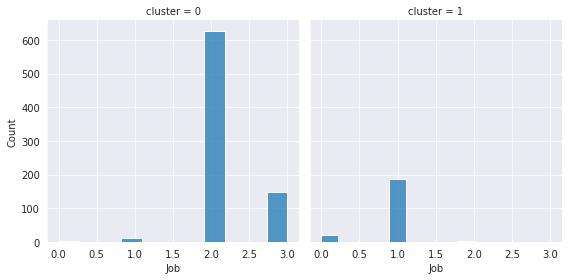

In [ ]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Job')
print("Jobs discription (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled")
print("There's definetly difference in Jobs of the clusters. Cluster 1 is less skilled and non-resident")

So the credi. Cluster 1 is less skilled and non-resident


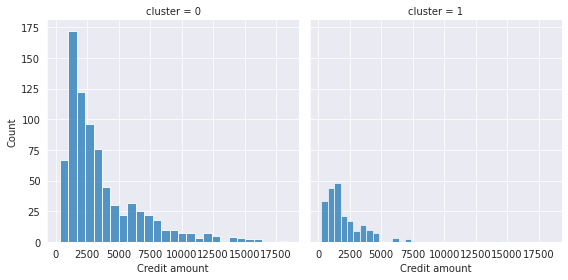

In [ ]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Credit amount')
print("Credit amount is very similar")

Gender distribution is similar


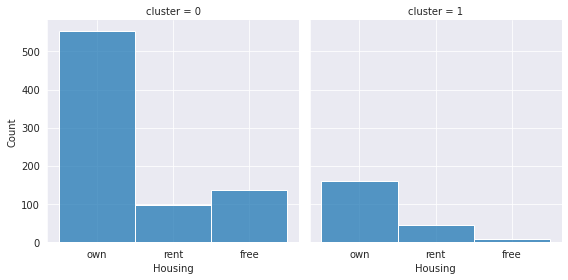

In [ ]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Housing')
print("free Housing clienst are all cluster 0")

Gender distribution is similar


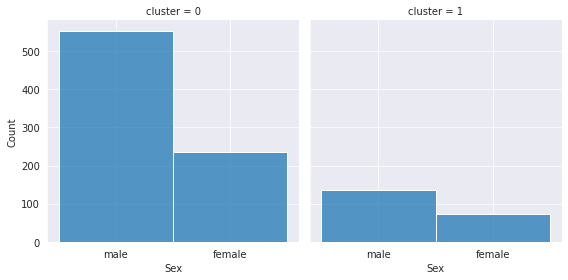

In [ ]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Sex')
print("Gender distribution is similar")

Duration distribution is similar


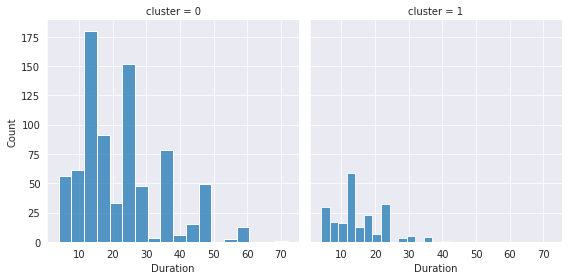

In [ ]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Duration')
print("Duration distribution is similar")

The educational purpose makes the biggest difference


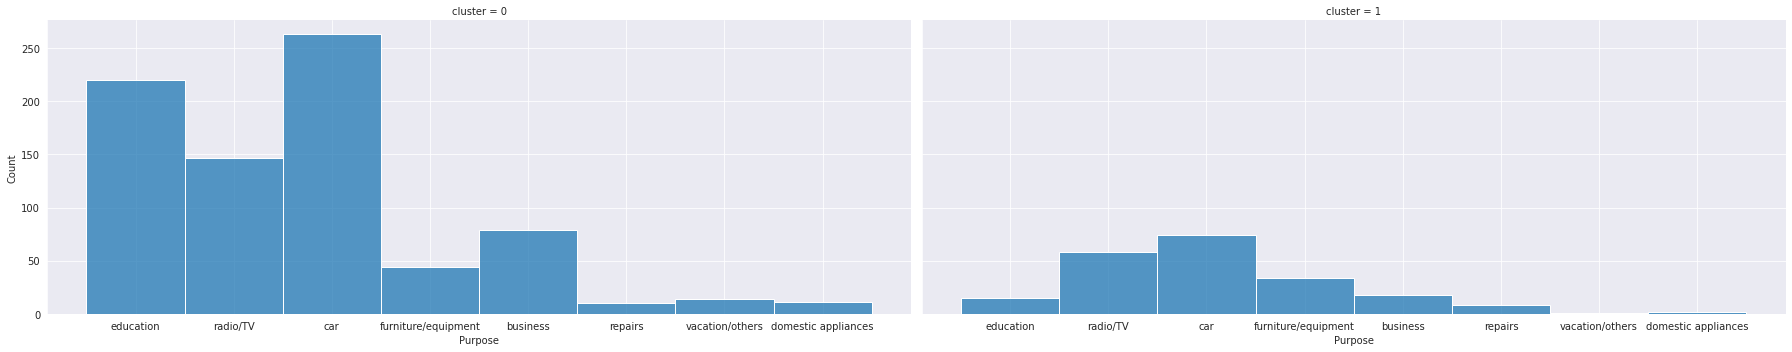

In [ ]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=5, aspect=2.5)
g.map(sns.histplot,'Purpose')

print("The educational purpose makes the biggest difference!")

#Simply: if the Job evaluation is "unskilled", the client's cluster num is 1. 
Also if the purpose is Education, Housing is free its highly likely the client is in cluster 0.

#I guess cluster 0 corresponds to  good credit risk since clients are skilled.
Also skilled clients tend to have purpose = education much more often.

#Analysis with UMAP + DBSCAN results

In [247]:
db = DBSCAN(eps = 1)
db.fit(umap_data_transformed)
clients['cluster'] = db.labels_

In [248]:
clients_wo_noise = clients[clients["cluster"] > -1]

Cant see the age difference in clusters


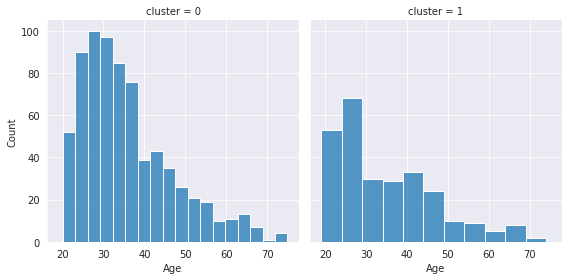

In [249]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Age')
print("Cant see the age difference in clusters")

Jobs discription (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled
There's definetly difference in Jobs of the clusters. Cluster 1 is less skilled and non-resident
!!!! There are some clients who are skilled and get to be in the cluster 1!!!!!


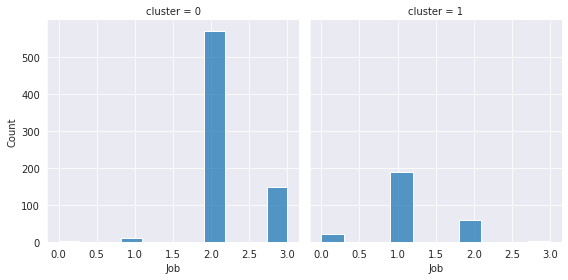

In [257]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Job')
print("Jobs discription (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled")
print("There's definetly difference in Jobs of the clusters. Cluster 1 is less skilled and non-resident")

print("!!!! There are some clients who are skilled and get to be in the cluster 1!!!!!")

Credit amount is very similar


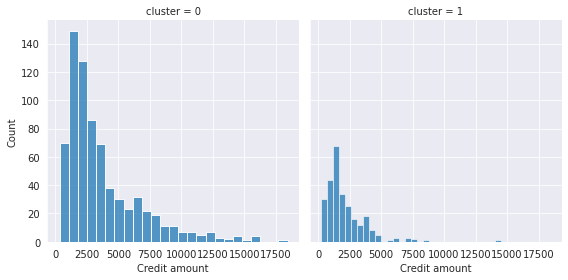

In [252]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Credit amount')
print("Credit amount is very similar")

free Housing clienst are all cluster 0


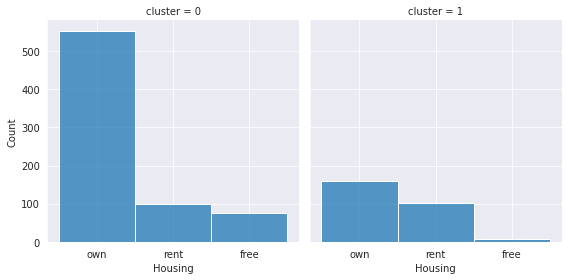

In [253]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Housing')
print("free Housing clienst are all cluster 0")

Gender distribution is now less similar!


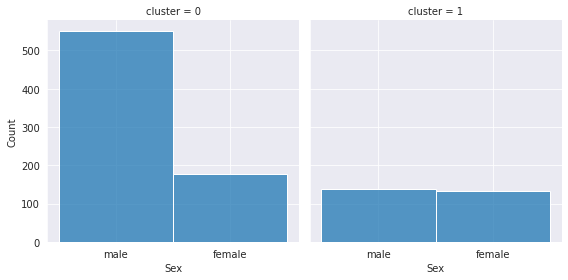

In [255]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Sex')
print("Gender distribution is now less similar!")

Duration distribution is similar


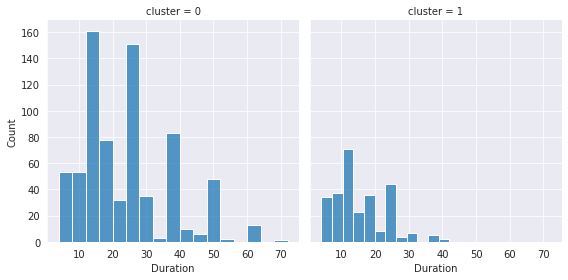

In [256]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=4, aspect=1.0)
g.map(sns.histplot,'Duration')
print("Duration distribution is similar")

The educational purpose makes the biggest difference!


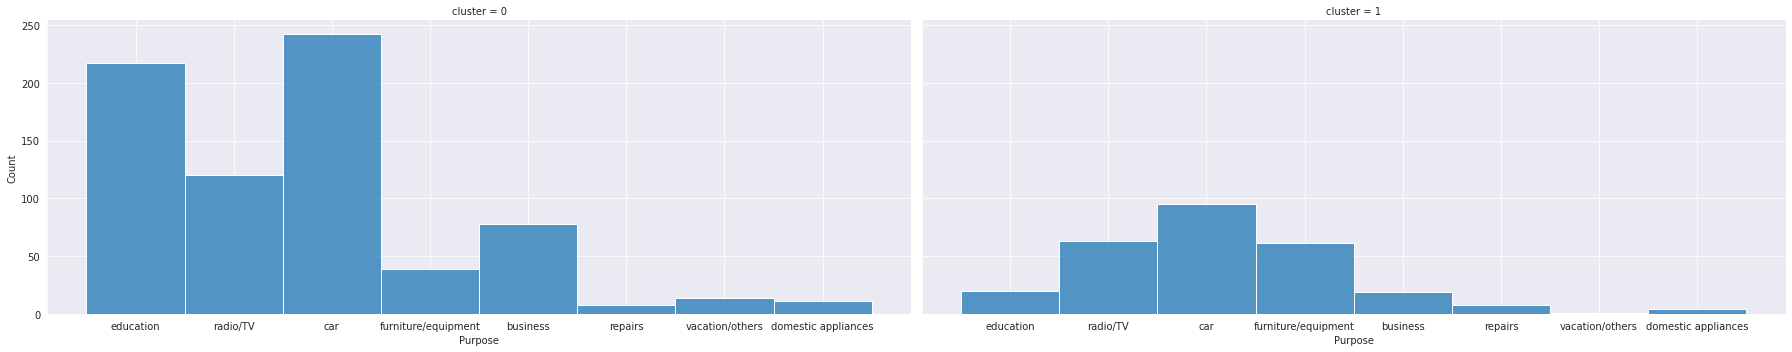

In [258]:
g = sns.FacetGrid(clients_wo_noise, col='cluster', height=5, aspect=2.5)
g.map(sns.histplot,'Purpose')

print("The educational purpose makes the biggest difference!")

#UMAP + DBSCAN model adds some skilled clients to the cluster with bad risk.